In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Input
from keras.models import Model


Using TensorFlow backend.


In [2]:
ds = pd.read_csv('/home/siddharth/ML/Data_set/train.csv')
ds.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ds.shape

(42000, 785)

In [3]:
data = ds.values[:8000, 1:]
print(data.shape)

(8000, 784)


In [4]:
inp = Input(shape=(784,))
h1 = Dense(100)##first hidden layer
a1 = Activation('sigmoid')
h2 = Dense(784)##second hidden layer(here it is the output layer)
a2 = Activation('sigmoid')
out = a2(h2(a1(h1(inp))))

model = Model(inputs=[inp], outputs=[out])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

In [6]:
split = int(0.8*data.shape[0])
X_train = data[:split]/255.0
Y_train = data[:split]/255.0

X_test = data[split:]/255.0
Y_test = data[split:]/255.0

print(X_train.shape, Y_train.shape)

(6400, 784) (6400, 784)


In [7]:
model.fit(X_train, Y_train, batch_size=8, epochs=60, validation_data=[X_test, Y_test])

Train on 6400 samples, validate on 1600 samples
Epoch 1/60
6400/6400 [==============================] - 3s 482us/step - loss: 0.0620 - acc: 0.0133 - val_loss: 0.0461 - val_acc: 0.0169
Epoch 2/60
6400/6400 [==============================] - 2s 381us/step - loss: 0.0389 - acc: 0.0142 - val_loss: 0.0331 - val_acc: 0.0119
Epoch 3/60
6400/6400 [==============================] - 2s 380us/step - loss: 0.0295 - acc: 0.0109 - val_loss: 0.0263 - val_acc: 0.0125
Epoch 4/60
6400/6400 [==============================] - 2s 374us/step - loss: 0.0240 - acc: 0.0116 - val_loss: 0.0220 - val_acc: 0.0119
Epoch 5/60
6400/6400 [==============================] - 2s 376us/step - loss: 0.0202 - acc: 0.0103 - val_loss: 0.0189 - val_acc: 0.0131
Epoch 6/60
6400/6400 [==============================] - 2s 378us/step - loss: 0.0174 - acc: 0.0081 - val_loss: 0.0165 - val_acc: 0.0150
Epoch 7/60
6400/6400 [==============================] - 3s 394us/step - loss: 0.0152 - acc: 0.0089 - val_loss: 0.0147 - val_acc: 0.0131


6400/6400 [==============================] - 2s 377us/step - loss: 0.0025 - acc: 0.0120 - val_loss: 0.0037 - val_acc: 0.0131


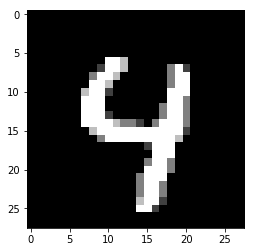

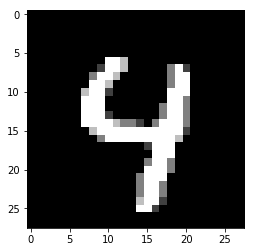

In [28]:
sample = X_train[78]
plt.imshow(sample.reshape((28,28)), cmap='gray')
plt.show()

model.predict(X_train)
plt.imshow(X_train[78].reshape((28,28)), cmap='gray')
plt.show()

In [8]:
##Encoder layer
inp = Input(shape=(784,))
enc_out = a1(h1(inp))
encoder = Model(inputs=[inp], outputs=[enc_out])

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [9]:
##decoder layer
dec_inp = Input(shape=(100,))
dec_out = a2(h2(dec_inp))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


In [14]:
img_batch = ds.values[20000:21000, 1:]/255.0
print(img_batch.shape)

ex = encoder.predict(img_batch)
print(ex.shape)

(1000, 784)
(1000, 100)


In [15]:
dx = decoder.predict(ex)
print(dx.shape)

(1000, 784)


20692


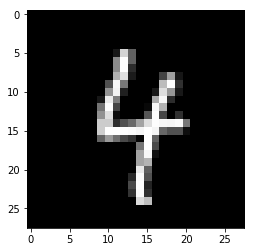

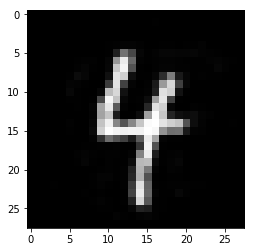

In [21]:
n = np.random.randint(20000,21000)
print(n)

plt.imshow(ds.values[n,1:].reshape((28,28)), cmap='gray')
plt.show()
           
plt.imshow(dx[n-20000].reshape((28,28)), cmap='gray')
plt.show()